In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import numpy as np
sns.set(style="white", color_codes=True)
from math import sqrt

In [7]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)

In [8]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


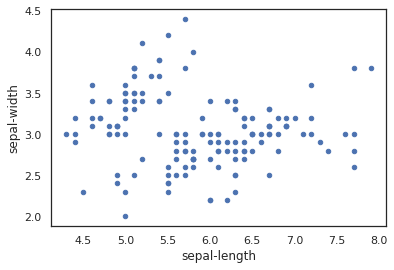

In [9]:
iris.plot(kind="scatter", x="sepal-length", y="sepal-width")

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


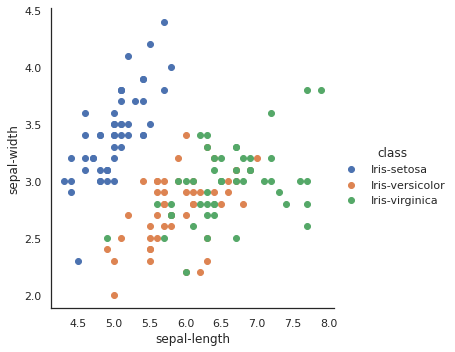

In [10]:
sns.FacetGrid(iris, hue="class", size=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

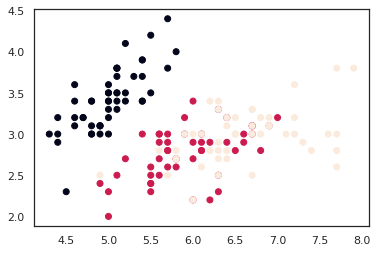

In [29]:
plt.scatter(
    x[:,0],x[:,1],c=y
)

In [12]:
# Split-out validation dataset
array = iris.values
x = array[:,0:4]
y = array[:,4]
for i in range(0,50):
  y[i]=0
for i in range(50,100):
  y[i]=1
for i in range(100,150):
  y[i]=2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=5, shuffle=True)

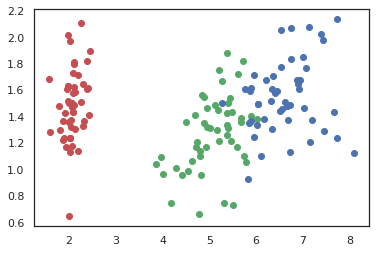

In [13]:
x=x.astype(float)
height, width = x.shape
unique_classes = np.unique(y)
num_classes = len(unique_classes)

scatter_t = np.cov(x.T)*(height - 1)
scatter_w = 0
for i in range(num_classes):
    class_items = np.flatnonzero(y == unique_classes[i])
    scatter_w = scatter_w + np.cov(x[class_items].T) * (len(class_items)-1)

scatter_b = scatter_t - scatter_w
colors = ['r','g','b']
labels = np.unique(y)
_ , eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
pc = x.dot(eig_vectors[:,::-1][:,:2])
for color, label in zip(colors, labels):
      class_data = pc[np.flatnonzero(y==label)]
      plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

In [14]:
def gradientDescent(learning_rate, x, y):
        w = np.matrix(np.zeros(x.shape[1]))
        parameters = int(w.ravel().shape[1])
        error = (x * w.T) - y

        for j in range(parameters):
         gradient = np.multiply(error, x[:, j])
         w[0, j] = w[0, j] - ((learning_rate / len(x)) * np.sum(gradient))
         return w




def lossFunction(w, x, y):
       inner = np.power(((x * w.T) - y), 2)
       return np.sum(inner) / (2 * len(x))


learning_rate = 0.0001


w = gradientDescent(learning_rate, x_train,y_train)
train_loss = lossFunction(w , x_train , y_train)
w = gradientDescent(learning_rate, x_test,y_test)
test_loss = lossFunction(w , x_test , y_test)


In [15]:
print(train_loss)
print(test_loss)
print("Accuracy = ",100-(test_loss))

59.11805327726318
18.95934230551089
Accuracy =  81.04065769448911


In [25]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(x_train, y_train.astype(float))
y_pred = classifier.predict(x_test)
print(classification_report(y_test.astype(float), y_pred))
con_matrix=confusion_matrix(y_test.astype(float), y_pred)
print(con_matrix)
print('accuracy is',accuracy_score(y_test.astype(float),y_pred)*100)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.83      0.83      0.83         6
         2.0       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23

[[8 0 0]
 [0 5 1]
 [0 1 8]]
accuracy is 91.30434782608695


In [17]:
misclassified_samples = x_test[y_test != y_pred]

In [18]:
print(misclassified_samples)

[[5.9 3.2 4.8 1.8]
 [6.3 2.8 5.1 1.5]]


In [19]:
index=[]
count=len(misclassified_samples)
for j in range(count):
 for i in range(0,150):
  if count==0:
    break
  if (misclassified_samples[count-1][0]==x[i][0] ) :
    if ( misclassified_samples[count-1][1]==x[i][1] ):
      if( misclassified_samples[count-1][2]==x[i][2] ):
        if(misclassified_samples[count-1][3]==x[i][3]):
           count=count-1
           index.append(i)

In [20]:
index.sort()
print(index)

[70, 133]


In [21]:
sum=0
new_class=0
for i in range(0,3):
  for j in range(0,3):
    sum=sum + con_matrix[i][j]
if sum < len(y_pred):
  new_class=sum - len(y_pred)
print(new_class)

0


In [28]:
class_error=0
for i in y_pred.astype(int):
  if i != 0 | i != 1 | i != 2:
     class_error=class_error+1
print(class_error)

0
